In [1]:
from cifar10_example import *

In [2]:
teacher = Model(build_teacher_model, "cifar10_teacher", fn_compile)
teacher.load()

In [3]:
xd,yd,xt,yt = load_data()

In [4]:
#(loss, acc) = teacher.model.evaluate(xt,yt,batch_size=128)
(loss, acc) = (0.44668698687553404, 0.9359) # pre calculated


In [5]:
student = Model(build_student_model, "cifar10_student", fn_compile)
callbacks = [keras.callbacks.TensorBoard('logs')]
h2 = student.train(xd,yd,128,30,callbacks,(xt,yt))

student.save()

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 107us/step - loss: 1.7374 - acc: 0.3959 - val_loss: 1.6138 - val_acc: 0.4315
Epoch 2/30
50000/50000 [==============================] - 5s 98us/step - loss: 1.5107 - acc: 0.4739 - val_loss: 1.4937 - val_acc: 0.4738
Epoch 3/30
50000/50000 [==============================] - 4s 89us/step - loss: 1.4031 - acc: 0.5068 - val_loss: 1.4806 - val_acc: 0.4862
Epoch 4/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.3338 - acc: 0.5303 - val_loss: 1.4479 - val_acc: 0.4888
Epoch 5/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.2777 - acc: 0.5499 - val_loss: 1.4356 - val_acc: 0.4997
Epoch 6/30
50000/50000 [==============================] - 5s 95us/step - loss: 1.2275 - acc: 0.5672 - val_loss: 1.4436 - val_acc: 0.4980
Epoch 7/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.1794 - acc: 0.5856 - val_loss: 1.4477 - val_ac

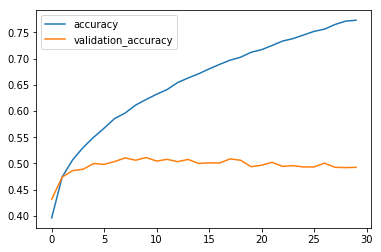

In [6]:
plt.plot(h2.history['acc'], label='accuracy')
plt.plot(h2.history['val_acc'], label='validation_accuracy')
plt.legend()

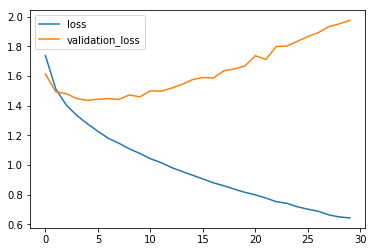

In [7]:
plt.plot(h2.history['loss'], label='loss')
plt.plot(h2.history['val_loss'], label='validation_loss')
plt.legend()

In [11]:
student2 = Model(build_student_model, "student2", fn_compile)

yd = np.load("datasets/cifar10preprocessed/train_y.npy")
yt = np.load("datasets/cifar10preprocessed/test_y.npy")

distill = Distill(teacher, student2, 10, 5.0, 0.07)
h3 = distill.teach(xd, yd, 128, 30, callbacks, (xt,yt), pre_processed=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 120us/step - loss: 2.2826 - accuracy: 0.4079 - top_5_accuracy: 0.8707 - categorical_crossentropy: 1.8973 - soft_logloss: 2.1498 - val_loss: 2.2403 - val_accuracy: 0.4560 - val_top_5_accuracy: 0.9009 - val_categorical_crossentropy: 1.7468 - val_soft_logloss: 2.1181
Epoch 2/30
50000/50000 [==============================] - 5s 106us/step - loss: 2.2205 - accuracy: 0.4825 - top_5_accuracy: 0.9118 - categorical_crossentropy: 1.6625 - soft_logloss: 2.1041 - val_loss: 2.2151 - val_accuracy: 0.4869 - val_top_5_accuracy: 0.9154 - val_categorical_crossentropy: 1.6517 - val_soft_logloss: 2.0995
Epoch 3/30
50000/50000 [==============================] - 5s 102us/step - loss: 2.1901 - accuracy: 0.5180 - top_5_accuracy: 0.9275 - categorical_crossentropy: 1.5393 - soft_logloss: 2.0824 - val_loss: 2.2130 - val_accuracy: 0.4912 - val_top_5_accuracy: 0.9130 - val_categorical_crossentropy: 1.6684

Epoch 26/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.0024 - accuracy: 0.7552 - top_5_accuracy: 0.9822 - categorical_crossentropy: 0.7615 - soft_logloss: 1.9491 - val_loss: 2.2282 - val_accuracy: 0.5167 - val_top_5_accuracy: 0.9181 - val_categorical_crossentropy: 2.0228 - val_soft_logloss: 2.0866
Epoch 27/30
50000/50000 [==============================] - 5s 96us/step - loss: 1.9974 - accuracy: 0.7616 - top_5_accuracy: 0.9837 - categorical_crossentropy: 0.7374 - soft_logloss: 1.9458 - val_loss: 2.2358 - val_accuracy: 0.5136 - val_top_5_accuracy: 0.9174 - val_categorical_crossentropy: 2.0714 - val_soft_logloss: 2.0908
Epoch 28/30
50000/50000 [==============================] - 5s 95us/step - loss: 1.9954 - accuracy: 0.7643 - top_5_accuracy: 0.9838 - categorical_crossentropy: 0.7269 - soft_logloss: 1.9445 - val_loss: 2.2332 - val_accuracy: 0.5189 - val_top_5_accuracy: 0.9151 - val_categorical_crossentropy: 2.0605 - val_soft_logloss: 2.0889
Epoch 29/30
50000/5000

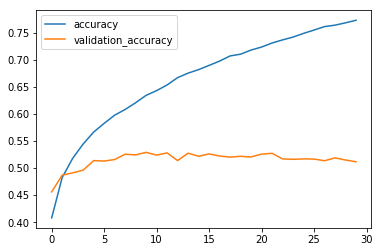

In [12]:
plt.plot(h3.history['accuracy'], label='accuracy')
plt.plot(h3.history['val_accuracy'], label='validation_accuracy')
plt.legend()

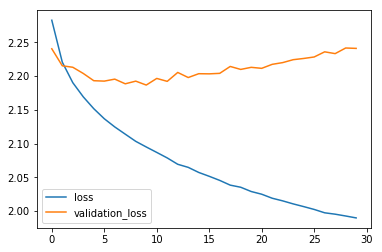

In [13]:
plt.plot(h3.history['loss'], label='loss')
plt.plot(h3.history['val_loss'], label='validation_loss')
plt.legend()

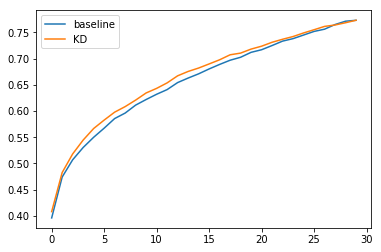

In [15]:
plt.plot(h2.history['acc'], label='baseline')
plt.plot(h3.history['accuracy'], label='KD')
plt.legend()

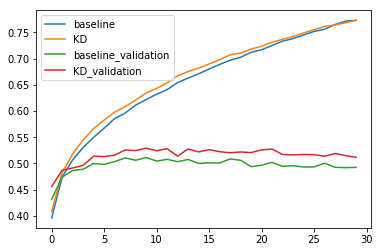

In [17]:
plt.plot(h2.history['acc'], label='baseline')
plt.plot(h3.history['accuracy'], label='KD')
plt.plot(h2.history['val_acc'], label='baseline_validation')
plt.plot(h3.history['val_accuracy'], label='KD_validation')
plt.legend()

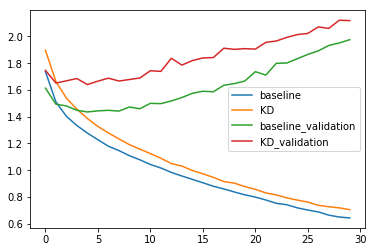

In [23]:
plt.plot(h2.history['loss'], label='baseline')
plt.plot(h3.history['categorical_crossentropy'], label='KD')
plt.plot(h2.history['val_loss'], label='baseline_validation')
plt.plot(h3.history['val_categorical_crossentropy'], label='KD_validation')
plt.legend()